In [17]:
import pandas as pd


In [18]:
discharge_df = pd.read_csv("Training and Testing Data.csv")

In [19]:
discharge_df.head(10)

,Year,Month,Rainfall (mm),Temperature,Runoff,Discharge
0,1964,1,17.67,24.63,0.00,27.67
1,1964,2,23.00,28.72,0.00,19.82
2,1964,3,50.00,35.02,0.00,16.57
3,1964,4,255.67,35.82,83.34,18.07
4,1964,5,221.00,34.26,56.19,19.73
5,1964,6,324.33,33.94,161.06,108.00
6,1964,7,358.00,30.99,208.89,311.67
7,1964,8,178.67,32.15,23.98,335.67
8,1964,9,299.00,31.75,146.23,302.00
9,1964,10,665.67,30.68,518.07,270.67


In [34]:
# Importing the libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [35]:
# Load the dataset 
data = pd.read_csv('Training and Testing Data.csv')

# Split data into features (X) and target (y)
X = data.drop('Discharge', axis=1)
y = data['Discharge']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model

In [36]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Regression Tree model
rt_model = DecisionTreeRegressor(random_state=42)
rt_model.fit(X_train, y_train)
rt_predictions = rt_model.predict(X_test)

# Evaluate models
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

rt_mae = mean_absolute_error(y_test, rt_predictions)
rt_rmse = np.sqrt(mean_squared_error(y_test, rt_predictions))
rt_r2 = r2_score(y_test, rt_predictions)

# Print results
print("Random Forest Model:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R2:", rf_r2)

print("\nRegression Tree Model:")
print("MAE:", rt_mae)
print("RMSE:", rt_rmse)
print("R2:", rt_r2)


Random Forest Model:
MAE: 51.158998666666655
RMSE: 82.06467661579858
R2: 0.7151839825782236

Regression Tree Model:
MAE: 72.41493333333334
RMSE: 114.12130674564384
R2: 0.4492108756125798


In [37]:
# Importing some more necessary libraries

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rt_model = DecisionTreeRegressor(random_state=42)
svr_model = SVR(kernel='linear')
lr_model = LinearRegression()

#pr_transformer = PolynomialFeatures(degree=2)
lr_pr_model = LinearRegression()

In [38]:
# Fit models
rf_model.fit(X_train, y_train)
rt_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
#X_train_pr = pr_transformer.fit_transform(X_train)
lr_pr_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)
rt_predictions = rt_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)
#X_test_pr = pr_transformer.transform(X_test)
pr_predictions = lr_pr_model.predict(X_test)

In [39]:
# Define performance metrics functions
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def nrmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return (rmse / (max(y_true) - min(y_true))) * 100

def cc(y_true, y_pred):
    y_mean = np.mean(y_true)
    return np.sum((y_true - y_mean) * (y_pred - y_mean)) / np.sqrt(np.sum((y_true - y_mean)**2) * np.sum((y_pred - y_mean)**2))


In [40]:

# Evaluate models
models = [rf_model, rt_model, svr_model, lr_model]
model_names = ['Random Forest', 'Regression Tree', 'Support Vector Regression', 'Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression']

for i, model in enumerate(models):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mape_val = mape(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    nrmse_val = nrmse(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    cc_val = cc(y_test, predictions)
    lmi = 1 - (np.sum(np.abs(y_test - predictions)) / np.sum(np.abs(y_test - np.mean(y_test)) + np.abs(predictions - np.mean(predictions))))
    wi = 1 - (np.sum(np.abs(predictions - y_test) + np.abs(predictions - np.mean(predictions))) / np.sum(np.abs(y_test - np.mean(y_test)) + np.abs(predictions - np.mean(predictions))))
    nse = 1 - (np.sum((y_test - predictions)**2) / np.sum((y_test - np.mean(y_test))**2))
    
    print(f"{model_names[i]}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.2f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
    print(f"Normalized RMSE (NRMSE): {nrmse_val:.2f}")
    print(f"Coefficient of Determination (R2): {r2:.2f}")
    print(f"Correlation Coefficient (CC): {cc_val:.2f}")
    print(f"Legates-McCabe Index (LMI): {lmi:.2f}")
    print(f"Willmott's Index (WI): {wi:.2f}")
    print(f"Nash-Sutcliffe Efficiency (NSE): {nse:.2f}")
    print("\n")

Random Forest:
Mean Absolute Error (MAE): 51.16
Mean Absolute Percentage Error (MAPE): 52.04
Root Mean Square Error (RMSE): 82.06
Normalized RMSE (NRMSE): 15.66
Coefficient of Determination (R2): 0.72
Correlation Coefficient (CC): 0.85
Legates-McCabe Index (LMI): 0.79
Willmott's Index (WI): 0.32
Nash-Sutcliffe Efficiency (NSE): 0.72


Regression Tree:
Mean Absolute Error (MAE): 72.41
Mean Absolute Percentage Error (MAPE): 70.27
Root Mean Square Error (RMSE): 114.12
Normalized RMSE (NRMSE): 21.77
Coefficient of Determination (R2): 0.45
Correlation Coefficient (CC): 0.71
Legates-McCabe Index (LMI): 0.70
Willmott's Index (WI): 0.23
Nash-Sutcliffe Efficiency (NSE): 0.45


Support Vector Regression:
Mean Absolute Error (MAE): 94.82
Mean Absolute Percentage Error (MAPE): 198.25
Root Mean Square Error (RMSE): 119.61
Normalized RMSE (NRMSE): 22.82
Coefficient of Determination (R2): 0.39
Correlation Coefficient (CC): 0.63
Legates-McCabe Index (LMI): 0.53
Willmott's Index (WI): 0.17
Nash-Sutclif

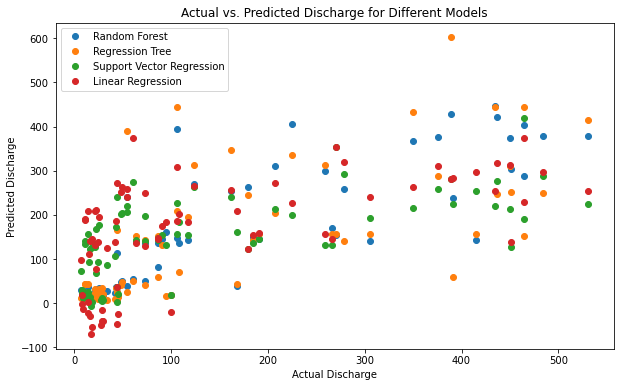

In [23]:
import matplotlib.pyplot as plt

# Initialize models
models = [
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Regression Tree', DecisionTreeRegressor(random_state=42)),
    ('Support Vector Regression', SVR(kernel='linear')),
    ('Linear Regression', LinearRegression()),
]

# Initialize figure and axis for plotting
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)

# Iterate through models and plot actual vs. predicted results
for model_name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Plot actual vs. predicted
    plt.plot(y_test, predictions, marker='o', linestyle='', label=model_name)

# Add labels and legend
plt.xlabel('Actual Discharge')
plt.ylabel('Predicted Discharge')
plt.title('Actual vs. Predicted Discharge for Different Models')
plt.legend()

# Show the plot
plt.show()

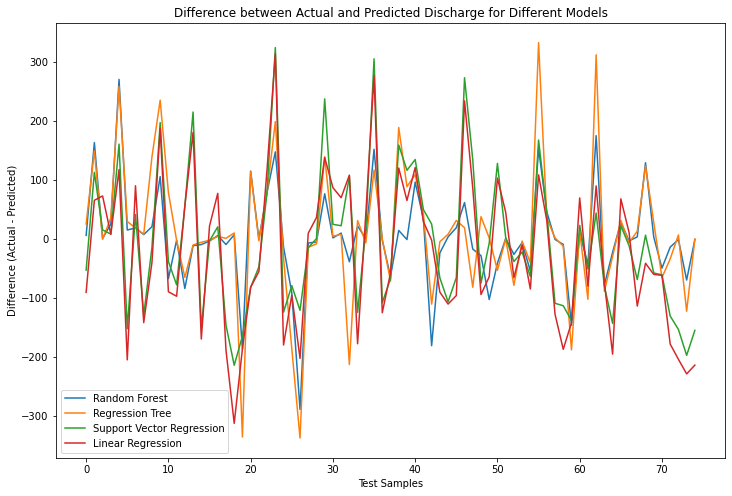

In [24]:
# Initialize figure and axis for plotting
plt.figure(figsize=(12, 8))

# Iterate through models and plot actual vs. predicted results
for model_name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate the difference between actual and predicted
    difference = y_test - predictions
    
    # Plot the difference over test samples
    plt.plot(range(len(difference)), difference, label=model_name)

# Add labels and legend
plt.xlabel('Test Samples')
plt.ylabel('Difference (Actual - Predicted)')
plt.title('Difference between Actual and Predicted Discharge for Different Models')
plt.legend()

# Show the plot
plt.show()

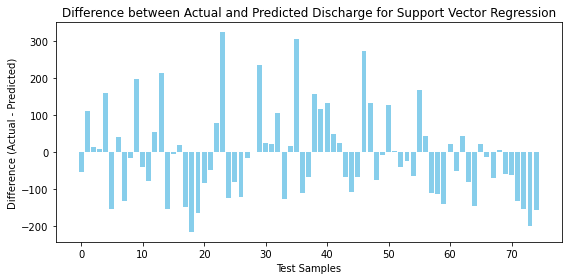

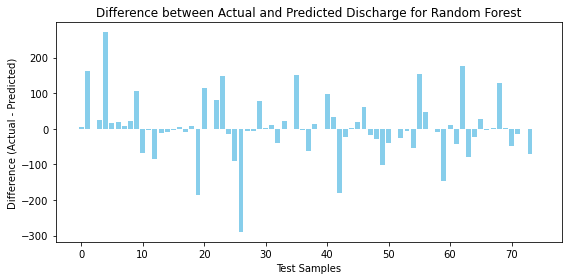

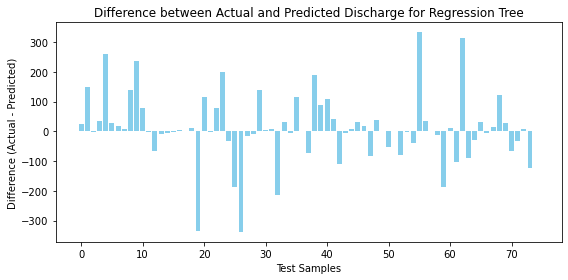

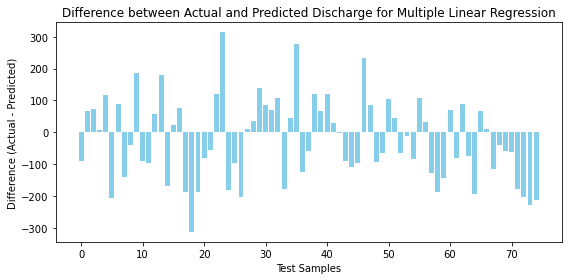

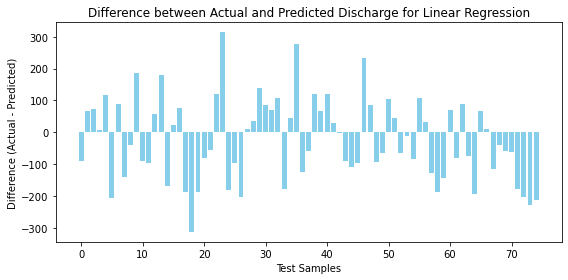

In [25]:
# Initialize models
models = [
    ('Support Vector Regression', SVR(kernel='linear')),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Regression Tree', DecisionTreeRegressor(random_state=42)),
    ('Multiple Linear Regression', LinearRegression()),
    ('Linear Regression', LinearRegression()),
]

# Iterate through models and create separate bar plots for differences
for model_name, model in models:
    plt.figure(figsize=(8, 4))
    
    # Fit the model and make predictions
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate the difference between actual and predicted
    difference = y_test - predictions
    
    # Create a bar plot for differences
    plt.bar(range(len(difference)), difference, color='skyblue', align='center')
    
    # Add labels and title
    plt.xlabel('Test Samples')
    plt.ylabel('Difference (Actual - Predicted)')
    plt.title(f'Difference between Actual and Predicted Discharge for {model_name}')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

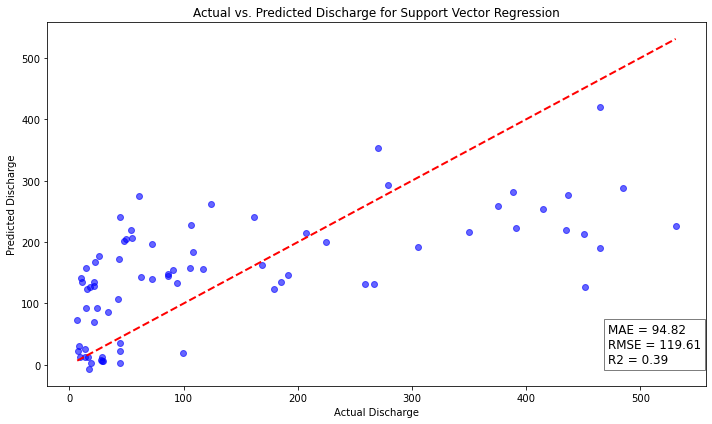

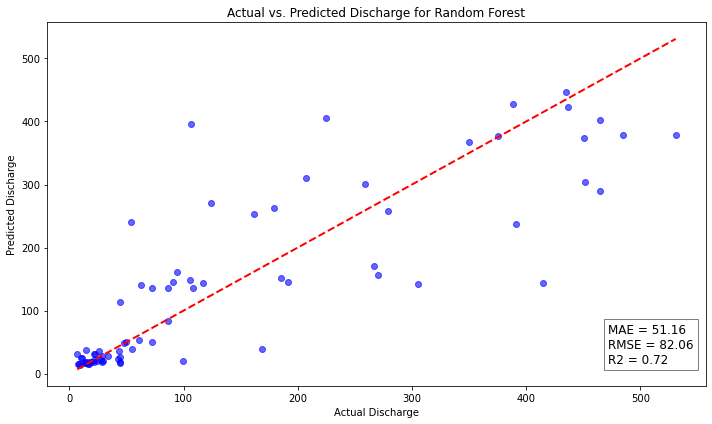

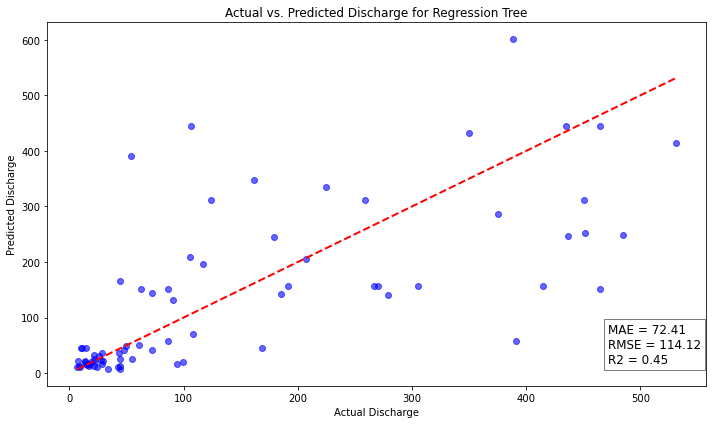

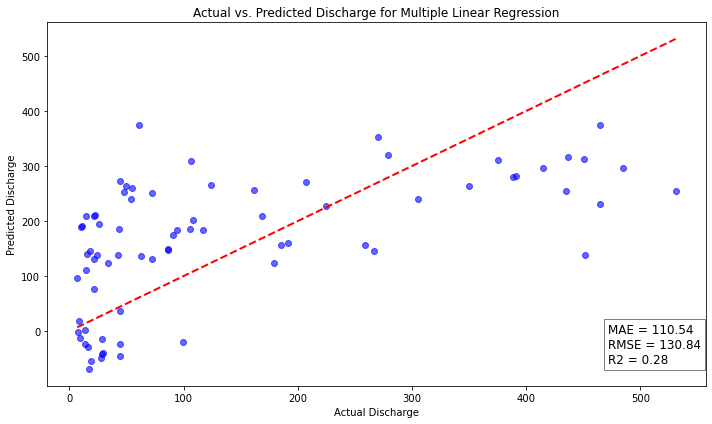

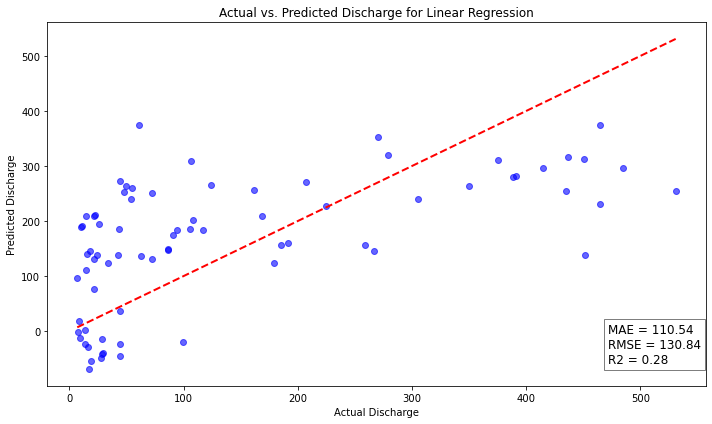

In [26]:
# Iterate through models and create separate plots with observed and predicted values
for model_name, model in models:
    plt.figure(figsize=(10, 6))
    
    # Fit the model and make predictions
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Create a scatter plot for observed vs. predicted values
    plt.scatter(y_test, predictions, color='blue', alpha=0.6)
    
    # Plot the ideal line (y=x) for reference
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
    
    # Add labels and title
    plt.xlabel('Actual Discharge')
    plt.ylabel('Predicted Discharge')
    plt.title(f'Actual vs. Predicted Discharge for {model_name}')
    
    # Add performance metrics to the figure
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    textstr = f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}\nR2 = {r2:.2f}"
    plt.gcf().text(0.85, 0.15, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [29]:
# Print header for the table
print("{:<30} {:<15} {:<15} {:<15} {:<15} {:<15}".format('Model', 'Phase', 'MAE', 'RMSE', 'R^2', 'Predictions'))

# Iterate through models and calculate evaluation metrics
for model_name, model in models:
    
    # Fit the model and make predictions
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    # Calculate evaluation metrics for training phase
    mae_train = mean_absolute_error(y_train, predictions_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    r2_train = r2_score(y_train, predictions_train)
    
    # Calculate evaluation metrics for testing phase
    mae_test = mean_absolute_error(y_test, predictions_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    r2_test = r2_score(y_test, predictions_test)
    
    # Print evaluation metrics for training phase
    print("{:<30} {:<15} {:<15.2f} {:<15.2f} {:<15.2f} {:<15}".format(model_name, 'Training', mae_train, rmse_train, r2_train, str(predictions_train)))
    
    # Print evaluation metrics for testing phase
    print("{:<30} {:<15} {:<15.2f} {:<15.2f} {:<15.2f} {:<15}".format(model_name, 'Testing', mae_test, rmse_test, r2_test, str(predictions_test)))


Model                          Phase           MAE             RMSE            R^2             Predictions    
Support Vector Regression      Training        109.52          149.17          0.38            [ 6.10832819e+01  1.18435909e+02 -3.63040192e+00  4.04587072e+01
  9.36965727e+01  2.31086178e+02  1.71105330e+02  1.76477935e+02
  1.85360911e+02  3.15346761e+02  2.12851094e+02  1.85058417e+02
  1.51347051e+02  2.32520428e+02  1.80235835e+00  7.34733381e+01
 -1.56051971e+01  1.84480758e+01  1.71770757e+02  2.41545317e+02
  1.78929028e+02  1.27740400e+02  2.30250637e+02  2.67563281e+02
 -8.22430614e-01  1.52550209e+02  2.04653440e+01  4.21477974e+01
  1.79581320e+02  2.20733271e+02  3.27872579e+01  2.61322852e+02
  1.93751349e+02  1.21062444e+01  1.56672478e+02  4.63414531e+02
  1.93011668e+02  2.26979015e+02  3.41412559e+02  2.42715460e+02
  2.48552115e+02  1.77051862e+02  3.06899292e+02  2.21084509e+02
  1.88751887e+02  1.27983579e+02  1.46938682e+02  2.83113056e+02
  3.14355354e+

In [30]:
# Print header for the table
print("{:<30} {:<15} {:<15} {:<15}".format('Model', 'Phase', 'MAE', 'RMSE'))

# Iterate through models and calculate evaluation metrics
for model_name, model in models:
    
    # Fit the model and make predictions
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    # Calculate evaluation metrics for training phase
    mae_train = mean_absolute_error(y_train, predictions_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    
    # Calculate evaluation metrics for testing phase
    mae_test = mean_absolute_error(y_test, predictions_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    
    # Print evaluation metrics for training phase
    print("{:<30} {:<15} {:<15.2f} {:<15.2f}".format(model_name, 'Training', mae_train, rmse_train))
    
    # Print evaluation metrics for testing phase
    print("{:<30} {:<15} {:<15.2f} {:<15.2f}".format(model_name, 'Testing', mae_test, rmse_test))


Model                          Phase           MAE             RMSE           
Support Vector Regression      Training        109.52          149.17         
Support Vector Regression      Testing         94.82           119.61         
Random Forest                  Training        21.36           35.41          
Random Forest                  Testing         51.16           82.06          
Regression Tree                Training        0.00            0.00           
Regression Tree                Testing         72.41           114.12         
Multiple Linear Regression     Training        113.40          143.47         
Multiple Linear Regression     Testing         110.54          130.84         
Linear Regression              Training        113.40          143.47         
Linear Regression              Testing         110.54          130.84         


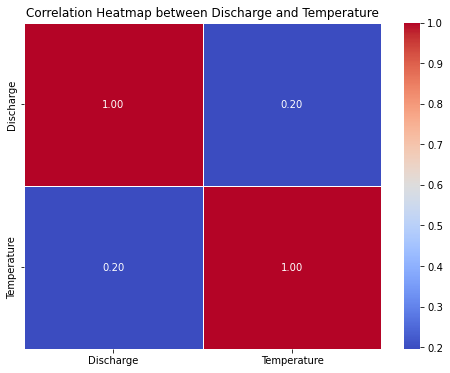

In [32]:
import seaborn as sns

discharge_runoff_corr = data[['Discharge', 'Temperature']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(discharge_runoff_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Discharge and Temperature')
plt.show()


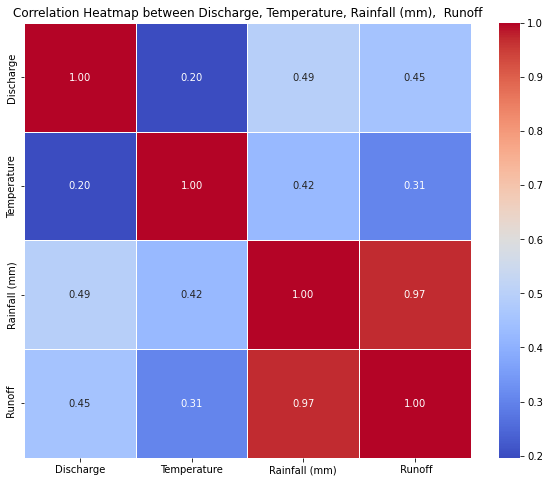

In [33]:
# Rename the column 'runoff' to 'Runoff (mm)'
data.rename(columns={'runoff': 'Runoff (mm)'}, inplace=True)

variables = ['Discharge', 'Temperature', 'Rainfall (mm)', ' Runoff']
correlation_matrix = data[variables].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Discharge, Temperature, Rainfall (mm),  Runoff')
plt.show()

